<a href="https://colab.research.google.com/github/estrickler1/CSPMA4413/blob/main/StricklerEthan_MATH4413_GroupCodingAssignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Authors of this Code:

Chiran Rayamajhi 

Bigyan Sharma 

Ethan Strickler

Watan Chadhaury

In [ ]:
import math
Pi = math.pi                                                                                                     #Number Pi
Sqrt2 = math.sqrt(2)                                                                                             #Number SQRT(2)
Center = Pi/4                                                                                                    #Taylor Series Center, Able to Change at any Time, Integrated Throughout Program

def TrueError(Estimate, Actual):                                                                                 #Defines True Error
  return Actual - Estimate

def RelativeTrueError(Estimate, Actual):                                                                         #Defines Relative True Error
  return TrueError(Estimate, Actual) / Actual

def ApproximateError(PreEstimate, CurEstimate):                                                                  #Defines Approximate Error
  return CurEstimate - PreEstimate

def RelativeApproximateError(PreEstimate, CurEstimate):                                                          #Defines Relative Approximate Error
  return ApproximateError(PreEstimate, CurEstimate) / CurEstimate
def GeneralTaylorCoefficient(Degree):                                                                            #Defines General Taylor Series
  return (-1)**(math.floor(Degree/2))/(Sqrt2*math.factorial(Degree))

def TaylorPolynomialTerm(Degree, Input):                                                                         #Defines Specific Term in Taylor Series
  return GeneralTaylorCoefficient(Degree)*(Input-Center)**Degree

def TaylorPolynomial(Degree, Input):                                                                             #Defines a Taylor Series, with a Specified Order, and Input
  sum = 0
  for i in range(0, Degree+1):
    sum = sum +  TaylorPolynomialTerm(i, Input)
  return sum

def BackwardDifference(Function,Initial,SpacialStep):                                                             #Defines Backward Differential Estimate
  return (Function(Initial)-Function(Initial-SpacialStep))/SpacialStep                                            #Intial Refers to the Initial Value of the Variable
                                                                                                                  
def CentralDifference(Function,Initial,SpacialStep):                                                              #Defines Central Differential Estimate
  return (Function(Initial+SpacialStep)-Function(Initial-SpacialStep))/(2*SpacialStep)

def ForwardDifference(Function,Initial,SpacialStep):                                                              #Defines Forward Differential Estimate
  return (Function(Initial+SpacialStep)-Function(Initial))/SpacialStep

def FiniteDifference(Function,Initial,SpacialStep):                                                               #Defines Finite Difference Approximation
  return (Function(Initial+2*SpacialStep)-2*Function(Initial+SpacialStep)+Function(Initial))/SpacialStep**2

In [ ]:
StepSize = [1, .5 , .25 , .1,.05,.01,.005,.001,.0005,.0001]                                                       #Spacial Step Size
Backward = [BackwardDifference(math.sin, Center,Step) for Step in StepSize]                                         #Backward Differential Estimate
Central = [CentralDifference(math.sin, Center,Step) for Step in StepSize]                                           #Central Differential Estimate
Forward = [ForwardDifference(math.sin, Center,Step) for Step in StepSize]                                           #Forward Differential Estimate
Finite = [FiniteDifference(math.sin, Center,Step) for Step in StepSize]                                             #Finite Difference Approximation
FirstActual = 1/Sqrt2
SecondActual = -1/Sqrt2

In [ ]:
BackwardTrueError = [TrueError(Estimate, FirstActual) for Estimate in Backward]                                   #Backward True Error 
BackwardRelativeError = [RelativeTrueError(Estimate, FirstActual) for Estimate in Backward]                       #Backward Relative True Error

CentralTrueError = [TrueError(Estimate, FirstActual) for Estimate in Central]                                     #Central True Error
CentralRelativeError = [RelativeTrueError(Estimate, FirstActual) for Estimate in Central]                         #Central Relative True Error

ForwardTrueError = [TrueError(Estimate, FirstActual) for Estimate in Forward]                                     #Forward True Error
ForwardRelativeError = [RelativeTrueError(Estimate, FirstActual) for Estimate in Forward]                         #Forward Relative True Error

FiniteTrueError = [TrueError(Estimate, SecondActual) for Estimate in Finite]                                      #Finite True Error 
FiniteRelativeError = [RelativeTrueError(Estimate, SecondActual) for Estimate in Finite]                          #Finite Relative True Error

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=4, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.03,
    specs=[[{"type": "table"}],
           [{"type": "table"}],
           [{"type": "table"}],
           [{"type": "table"}]]
)


fig.add_trace(go.Table(                                                                                                         #Creates Backward Table
                header=dict(values=['Spacial Step Size', 'Backward Estimate', 'True Error','Relative True Error']),
                 cells=dict(values = [StepSize,Backward,BackwardTrueError,BackwardRelativeError])),row = 1, col = 1)
                     
fig.add_trace(go.Table(                                                                                                         #Creates Central Table
                header=dict(values=['Spacial Step Size', 'Central Estimate', 'True Error','Relative True Error']),
                 cells=dict(values = [StepSize,Central,CentralTrueError,CentralRelativeError])),row = 2, col = 1)

fig.add_trace(go.Table(                                                                                                         #Creates Forward Table 
                header=dict(values=['Spacial Step Size', 'Forward Estimate', 'True Error','Relative True Error']),
                 cells=dict(values = [StepSize,Forward,ForwardTrueError,ForwardRelativeError])),row = 3, col = 1)
                     
fig.add_trace(go.Table(                                                                                                         #Creates Finite Table
                header=dict(values=['Spacial Step Size', 'Finite Estimate', 'True Error','Relative True Error']),
                 cells=dict(values = [StepSize,Finite,FiniteTrueError,FiniteRelativeError]))
                     ,row = 4, col = 1)
fig.show()

In [ ]:
def LagrangeCoefficient(InArray,OutArray,Entry,Variable):                           
  lc = 1
  for i in range(len(InArray)):
    if i == Entry:
      continue
    else:
      lc = lc*(Variable - InArray[i])/(InArray[Entry]-InArray[i])
  return lc

def LagrangeInterpolator(InArray, OutArray, Variable):
  li = 0
  for i in range(len(InArray)):
    li = li + LagrangeCoefficient(InArray,OutArray,i,Variable)*OutArray[i]
  return li

InValues = [Center,Center+.1,2*Center]
OutValues = [math.sin(x) for x in InValues]

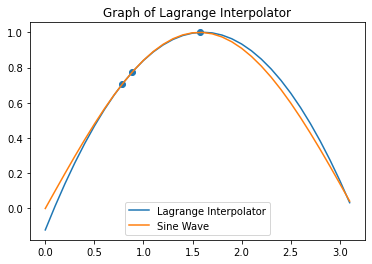

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange( 0,Pi,0.1)
plt.scatter(InValues,OutValues)
plt.plot(x,LagrangeInterpolator(InValues,OutValues,x))
plt.plot(x, np.sin(x))
plt.title('Graph of Lagrange Interpolator')
plt.legend(['Lagrange Interpolator', 'Sine Wave'])

plt.show()


In [ ]:
FunctionErrors = [TrueError(LagrangeInterpolator(InValues,OutValues,Center+.2),math.sin(Center+.2)),TrueError(LagrangeInterpolator(InValues,OutValues,Center+.2),math.sin(Center+.2))]
FunctionErrors

[0.0009511088336823237, 0.0009511088336823237]

In [ ]:
SecondDerivativeOfLagrangeInterpolation = 2*OutValues[0]/((InValues[0]-InValues[1])*(InValues[0]-InValues[2]))+2*OutValues[1]/((InValues[1]-InValues[0])*(InValues[1]-InValues[2]))+2*OutValues[2]/((InValues[2]-InValues[0])*(InValues[2]-InValues[1]))
SecondDerivativeOfLagrangeInterpolation

-0.8686330376211258

In [ ]:
SecondDerivativeErrors = [TrueError(SecondDerivativeOfLagrangeInterpolation,-1/Sqrt2),RelativeTrueError(SecondDerivativeOfLagrangeInterpolation,-1/Sqrt2)]
SecondDerivativeErrors

[0.1615262564345783, -0.22843262252913507]

e Lagrange interpolating polynomial is the polynomial P(x) of degree <=(n-1) that passes through the n points (x_1,y_1=f(x_1)),  (x_2,y_2=f(x_2)), ..., (x_n,y_n=f(x_n)), and is given by

 P(x)=sum_(j=1)^nP_j(x), 	
(1)
where

 P_j(x)=y_jproduct_(k=1; k!=j)^n(x-x_k)/(x_j-x_k). 	
(2)
Written explicitly,

P(x)	=	((x-x_2)(x-x_3)...(x-x_n))/((x_1-x_2)(x_1-x_3)...(x_1-x_n))y_1+((x-x_1)(x-x_3)...(x-x_n))/((x_2-x_1)(x_2-x_3)...(x_2-x_n))y_2+...+((x-x_1)(x-x_2)...(x-x_(n-1)))/((x_n-x_1)(x_n-x_2)...(x_n-x_(n-1)))y_n.

The weighting function L(x) in Lagrange interpolation is based on a product of n-1 terms with terms of i=j ommitted which mainly dermines the function of it. One use is to find out the upward velocity of a rocket.